In [1]:
import numpy as np
import matplotlib.pyplot as plt

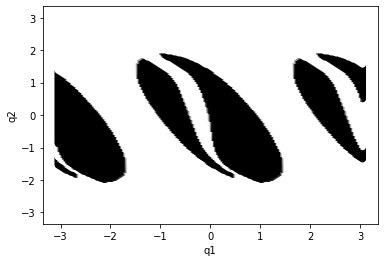

In [2]:
arr = np.load("cspace_hw3.npy")
c, q1, q2 = arr
c = ~c.astype(int)
plt.scatter(q1.flatten(), q2.flatten(), c=c.flatten(), cmap="gray")
plt.xlabel("q1")
plt.ylabel("q2")
plt.show()

In [3]:
from skimage.morphology import skeletonize
from skimage import data
import matplotlib.pyplot as plt
from skimage.util import invert

# Invert the horse image
image = invert(data.horse())

print(image.shape)

(328, 400)


In [4]:
image = plt.imread("cspace_image.png")
im = image.flatten()
# np.sum(im)

https://scikit-image.org/docs/stable/auto_examples/edges/plot_skeleton.html



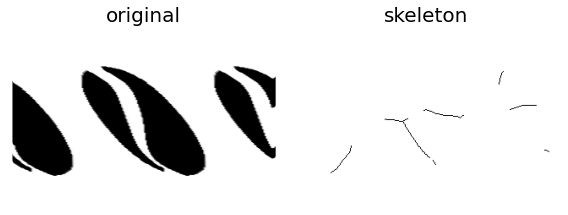

In [5]:
# perform skeletonization
skeleton = skeletonize(image)

# display results
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4),
                         sharex=True, sharey=True)

ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].axis('off')
ax[0].set_title('original', fontsize=20)

ax[1].imshow(skeleton, cmap=plt.cm.gray)
ax[1].axis('off')
ax[1].set_title('skeleton', fontsize=20)

fig.tight_layout()
plt.show()

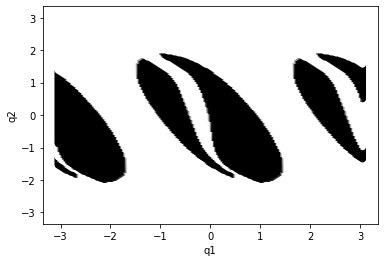

In [6]:
arr = np.load("cspace_hw3.npy")
c, q1, q2 = arr
c = ~c.astype(int)
plt.scatter(q1.flatten(), q2.flatten(), c=c.flatten(), cmap="gray")
plt.xlabel("q1")
plt.ylabel("q2")
plt.show()

In [7]:
from skimage.morphology import skeletonize
from skimage import data
import matplotlib.pyplot as plt
from skimage.util import invert

# Invert the horse image
image = invert(data.horse())

print(image.shape)

(328, 400)


https://scikit-image.org/docs/stable/auto_examples/edges/plot_skeleton.html



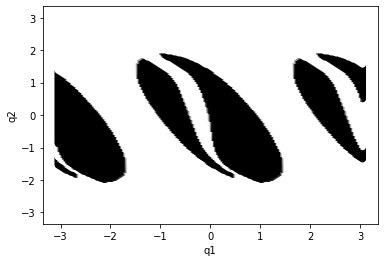

In [8]:
arr = np.load("cspace_hw3.npy")
c, q1, q2 = arr
c = ~c.astype(int)
plt.scatter(q1.flatten(), q2.flatten(), c=c.flatten(), cmap="gray")
plt.xlabel("q1")
plt.ylabel("q2")
plt.show()

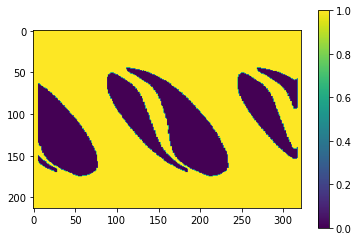

In [9]:
from PIL import Image
img = Image.open('cspace_image.png').convert('L')
img = np.array(img)
mask = img > 128
img[mask] = 1
img[~mask] = 0

plt.imshow(img)
plt.colorbar()
plt.show()



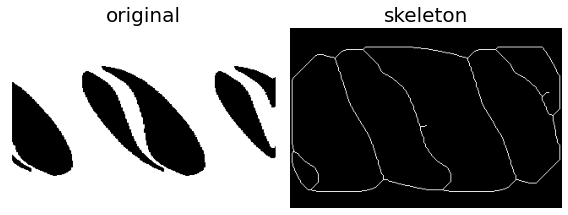

In [10]:
# perform skeletonization
skeleton = skeletonize(img)

# display results
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4),
                         sharex=True, sharey=True)

ax = axes.ravel()

ax[0].imshow(img, cmap=plt.cm.gray)
ax[0].axis('off')
ax[0].set_title('original', fontsize=20)

ax[1].imshow(skeleton, cmap=plt.cm.gray)
ax[1].axis('off')
ax[1].set_title('skeleton', fontsize=20)

fig.tight_layout()
plt.show()

In [11]:
original = np.concatenate([
    img.copy()[..., None] * 255,
    img.copy()[..., None] * 255,
    img.copy()[..., None] * 255,
], axis=-1)

skel = np.concatenate([
    skeleton.copy()[..., None] * 255,
    skeleton.copy()[..., None] * 0,
    skeleton.copy()[..., None] * 0,
], axis=-1)

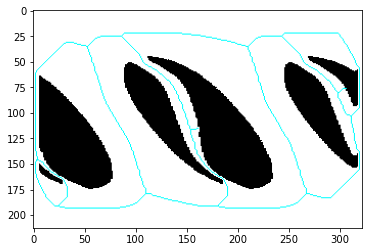

In [12]:
final = original - skel

plt.imshow(final)
plt.show()

In [13]:
final.shape

(213, 322, 3)

In [15]:
np.save("skeleton.npy", skeleton)

In [ ]:
skeleton